## Examples on how to use the code

In [1]:
# import modules
import numpy as np
import logitreg as lr
import reglogitreg as reglr

In [2]:
data1 = np.loadtxt("./data examples/ex2data1.txt", delimiter=",")
x_data1 = data1[:, :-1]
y_data1 = data1[:, -1]

data2 = np.loadtxt("./data examples/ex2data2.txt", delimiter=",")
x_data2 = data2[:, :-1]
y_data2 = data2[:, -1]

### Visualize data examples

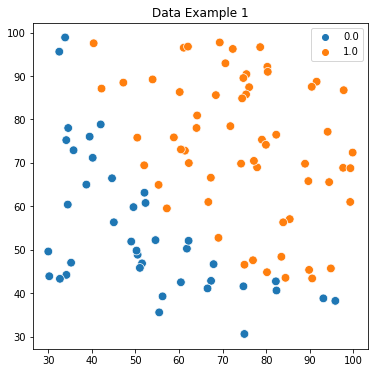

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]
g = sns.scatterplot(x=x_data1[:, 0], y=x_data1[:, 1], hue=y_data1, s=75)
plt.title('Data Example 1')
plt.show()

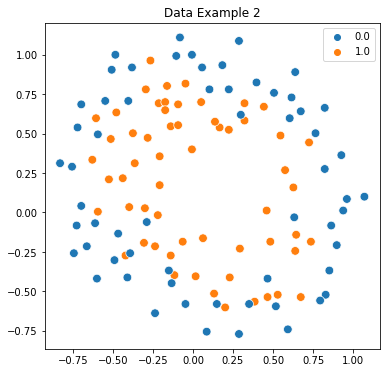

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]
sns.scatterplot(x=x_data2[:, 0], y=x_data2[:, 1], hue=y_data2, s=75)
plt.title('Data Example 2')
plt.show()

### Using logitreg module for data example 1

<code>logitreg</code> module provide function that utilize gradient descent to find optimal model parameters for logistic regression binary classification problem. We will implemented this module on data example 1, but before it we need to set some initial parameters (such as alpha, number of iterations, learning rate, w and b - model parameters).

In [5]:
params = {
    'iters': 10000,
    'alpha': 0.001,
    'w_in': 0.01 * (np.random.rand(2) - 0.5),
    'b_in': -8,
    'lambda_':0 # set lambda_ to zero when not using regularization
}
w, b, history_J = lr.logreg_gd(
    x_data1, y_data1, params, cost_func=lr.calc_cost,
    grad_func=lr.calc_gradient)

Iteration 0: 
Cost 4.669050653911916
Iteration 2000: 
Cost 0.3047230088850609
Iteration 4000: 
Cost 0.3039951997091645
Iteration 6000: 
Cost 0.3032768698037682
Iteration 8000: 
Cost 0.302567833189999
Iteration 10000: 
Cost 0.3018682564442189


In [6]:
pred_y = lr.predict(x_data1, w, b)
hues = []
for idx, val in enumerate(pred_y):
    if val == y_data1[idx]:
        if val == 1:
            hues.append('Class 1')
        else:
            hues.append('Class 2')
    else:
        hues.append('Missed')

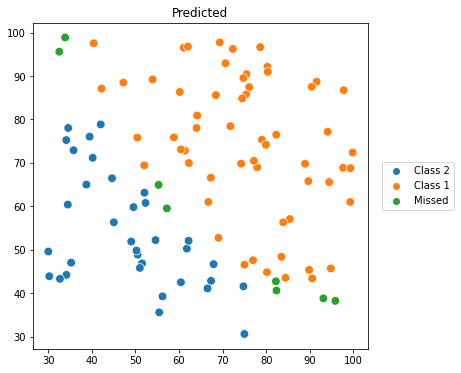

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]
sns.scatterplot(x=x_data1[:, 0], y=x_data1[:, 1], hue=hues, s=75)
plt.title('Predicted')
plt.legend(bbox_to_anchor=(1.15, 0.50), loc='center', borderaxespad=0)
plt.show()

### Using reglogitreg module for data example 2
<code>reglogitreg</code> module provide regularized logistic regression that can be used to avoid overfitting to data, even when we have a large set of polynomial features. We will implemented this regularized logistic regression on data example 2. But before it, we'll do some feature mapping.

In [8]:
# feature mapping
def map_feature(x1, x2, degree):
    output = []
    for d in range(1, degree+1):
        x1_d = x1**d
        x2_d = x2**d
        output.append(x1_d)
        output.append(x2_d)
        output.append(x1_d*x2_d)
    output_np = np.stack(output, axis=1)
    return output_np

In [37]:
x_mapped = map_feature(x_data2[:, 0], x_data2[:, 1], degree=5)

params_in = {
    'alpha': 0.3,
    'iters': 20000,
    'lambda_': 0.03,
    'w_in': np.random.rand(x_mapped.shape[1])-0.5,
    'b_in': 1.
}

We use the same gradient descent function from `logitreg` module here, that is `logitreg.logreg_gd`. But, we need to change the cost function and the gradient function when performing gradient descent. We can use `reglogitreg.calc_cost_reg` for the cost function, and `reglogitreg.calc_gradient_reg` for the gradient function.

In [38]:
w, b, historyJ = lr.logreg_gd(x_mapped, y_data2, params_in,
                              cost_func=reglr.calc_cost_reg,
                              grad_func=reglr.calc_gradient_reg)

Iteration 0: 
Cost 0.8060882592507664
Iteration 4000: 
Cost 0.36790461304168876
Iteration 8000: 
Cost 0.36584642697535086
Iteration 12000: 
Cost 0.36541290197937176
Iteration 16000: 
Cost 0.3652299394043513
Iteration 20000: 
Cost 0.3651439059781602


In [39]:
# generate prediction
pred_y2 = lr.predict(x_mapped, w, b)
hues_y2 = []

for idx, val in enumerate(pred_y2):
    if val == y_data2[idx]:
        if val==1:
            hues_y2.append('Class 1')
        else:
            hues_y2.append('Class 0')
    else:
        hues_y2.append('Missed')

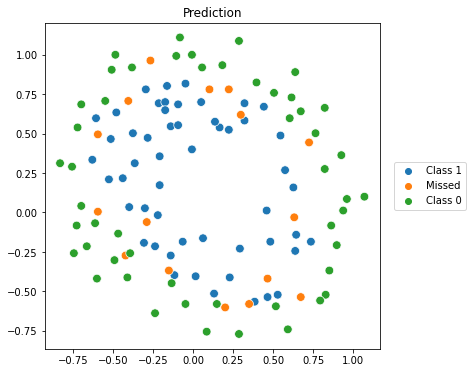

In [40]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]
sns.scatterplot(x=x_data2[:, 0], y=x_data2[:, 1], hue=hues_y2, s=75)
plt.title('Prediction')
plt.legend(bbox_to_anchor=(1.15, 0.50), loc='center', borderaxespad=0)
plt.show()